Mounted at /content/drive
Python 3.10.12
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 20.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 67.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 690.2/690.2 kB 58.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 68.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 858.3/858.3 kB 58.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 75.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for networkx: filename=networkx-2.2-py2.py3-none-any.whl size=1526911 sha256=c08f15c782eb8a

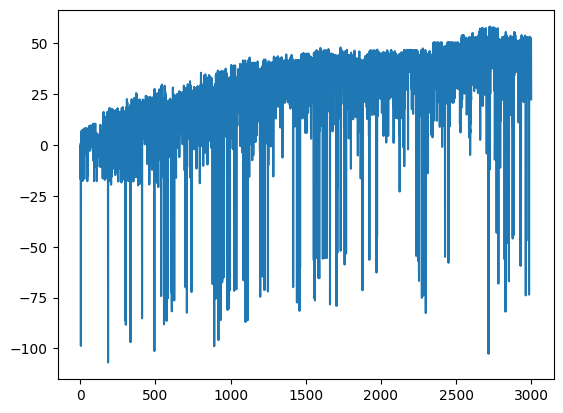

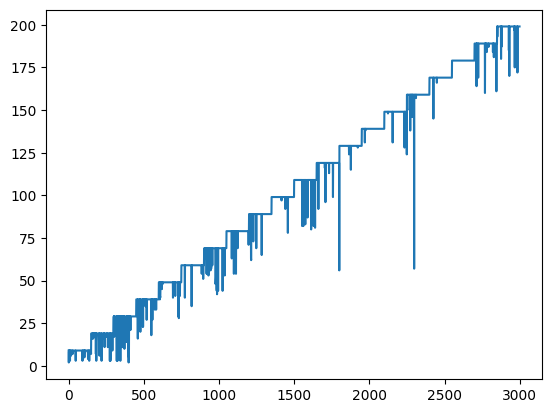

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Update the path based on the location of your file
#file_path = '/content/drive/My Drive/ColabNotebooks/5qlearning/environment_moved_east.py'############

# Add the directory containing the file to sys.path
import sys
sys.path.append('/content/drive/My Drive/ColabNotebooks/5qlearning/moved_environments')
#sys.path.append('/usr/local/lib/python3.7/site-packages/')

!python3 --version
!pip install pybullet
!pip install gymnasium
!pip install urdfpy
########################

import numpy as np
import random
import pybullet as p
from environment_moved_east import Env###################
from collections import defaultdict
import os
import matplotlib.pyplot as plt
import math
import time
import csv

def export_to_csv(data, filename):
    with open(filename, 'w', newline='') as csv_file:
        csv_writer = csv.writer(csv_file)

        # Write header
        csv_writer.writerow(['Key', 'Value'])

        # Write data
        for key, value in data.items():
            csv_writer.writerow([key, value])



start_time = time.time()

cwd = os.getcwd() # Get the current working directory (cwd)
files = os.listdir(cwd) # Get all the files in that directory

hours=0
minutes=1

run_time=60*60*hours+60*minutes # # # # # # # # # # # #  # # # # # # # # # # runtime

while time.time()<start_time+run_time:
#for asdf in range(1, 8):

  Current_time=time.time()-start_time
  time_fraction=Current_time/run_time

  global lr
  #lr=10**(-0.45)
  lr=0.3981
  lr=round(lr, 4)
  global df
  df=0.9
  global eps
  #eps=10**(-3)
  #eps=(time_fraction)**4
  #eps=10**(-0.5*(asdf+1))
  eps=0.3162
  eps=round(eps, 4)
  global number_of_steps
  number_of_steps = 3000 # # # # # # # #  # # # # # # # # #  number of steps

  reward=0



  class QLearningAgent:
    def __init__(self, actions):
        # actions = [0, 1, 2, 3]
        global lr
        global df
        global eps
        self.actions = actions
        self.learning_rate = lr #was 0.01
        self.discount_factor = df #was 0.9
        self.epsilon = eps# was 0.1
        self.q_table = defaultdict(lambda: [0.1, 0.1, 0.1, 0.1])
        global qarr
        qarr=self.q_table

    # update q function with sample <s, a, r, s'>
    def learn(self, state, action, reward, next_state):
        current_q = self.q_table[state][action]
        # using Bellman Optimality Equation to update q function
        new_q = reward + self.discount_factor * max(self.q_table[next_state])
        self.q_table[state][action] += self.learning_rate * (new_q - current_q)
        global qarr
        qarr=self.q_table
        #print(self.q_table)

    # get action for the state according to the q function table
    # agent pick action of epsilon-greedy policy
    def get_action(self, state):
        global number_of_steps

        #self.epsilon=self.epsilon*0.99995
        if np.random.rand() < self.epsilon and n-30<=trial:
            # take random action
            action = np.random.choice(self.actions)

        else:
            # take action according to the q function table
            state_action = self.q_table[state]
            action = self.arg_max(state_action)
        return action

    @staticmethod
    def arg_max(state_action):
        max_index_list = []
        max_value = state_action[0]
        for index, value in enumerate(state_action):
            if value > max_value:
                max_index_list.clear()
                max_value = value
                max_index_list.append(index)
            elif value == max_value:
                max_index_list.append(index)
        return random.choice(max_index_list)

    def q_table(self):
        print(self.q_table)



  if __name__ == "__main__":
      env = Env()
      agent = QLearningAgent(actions=list(range(env.n_actions)))

      global qarr
      print(qarr)

      episode_plot=[]
      reward_sum_plot=[]
      trial_plot=[]

      for episode in range(number_of_steps):
          state = env.reset()

          #global number_of_steps
          n=(episode//int(number_of_steps/20))*10+10
          if episode%(number_of_steps/20)==0:
            print(n)

          if episode==(number_of_steps-1):

              filename = '/content/drive/My Drive/ColabNotebooks/5qlearning/Q_tables_moved/RP3_East_'+str(lr)+'_'+str(df)+'_'+str(eps)+'_'+str(number_of_steps)+'.csv'#################################################FIlename direction
              export_to_csv(qarr, filename)


          for trial in range(n):
              env.render()

              # take action and proceed one step in the environment
              action = agent.get_action(str(state))
              next_state, reward, done, reward_sum = env.step(action)

              # with sample <s,a,r,s'>, agent learns new q function
              agent.learn(str(state), action, reward, str(next_state))

              state = next_state
              #env.print_value_all(agent.q_table)

              if trial==n-1:
                  done=True

              # if episode ends, then break
              if done:

                  #print("episode:", episode, "   trials completed:", trial, "    reward:", reward_sum)

                  episode_plot=np.concatenate((episode_plot, [episode]))
                  reward_sum_plot = np.concatenate((reward_sum_plot, [reward_sum]))
                  trial_plot = np.concatenate((trial_plot, [trial]))


                  break





  f=plt.figure(1)
  plt.plot(episode_plot, reward_sum_plot)
  f.show()

  g=plt.figure(2)
  plt.plot(episode_plot, trial_plot)
  g.show()

  data_array = np.vstack((episode_plot, reward_sum_plot, trial_plot))

  #import csv

  # field names
  #fields = ['Episode', 'Reward', 'Trials']

  # data rows of csv file
  rows = data_array

  # name of csv file
  #filename = "university_records.csv"
  filename = '/content/drive/My Drive/ColabNotebooks/5qlearning/CSVs_moved/RP3_East_'+str(lr)+'_'+str(df)+'_'+str(eps)+'_'+str(number_of_steps)+'.csv'##############################################file name direction
  print(filename)

  # writing to csv file
  with open(filename, 'w') as csvfile:
      # creating a csv writer object
      csvwriter = csv.writer(csvfile)

      # writing the fields
      #csvwriter.writerow(fields)

      # writing the data rows
      csvwriter.writerows(rows)
  #agent.q_table()
  print((time.time() - start_time))
  #plt.pause(0)